In [1]:
pip install tensorflow_addons==0.23.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 6.0 MB/s eta 0:00:00:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow==2.14.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.8/489.8 MB 3.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 15.3 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 54.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 90.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 50.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 62.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 37.6 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 52.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 41.6 MB/s eta 0:00:00:

In [3]:
pip install transformers==4.34.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.5/121.5 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 40.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 22.5 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 39.3 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 6.7 MB/s eta 0:00:00ta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import transformers #huggingface transformers library

from sklearn import metrics # for classification report
from sklearn.model_selection import train_test_split # train/test split feature
from sklearn.preprocessing import LabelEncoder 
from transformers import TFAutoModel, AutoTokenizer
from sklearn.metrics import confusion_matrix, hamming_loss, f1_score # Model Performance metrics
from tensorflow.keras.callbacks import EarlyStopping # Helps stopping training when the model does not improve over a certain value
from tensorflow_addons.metrics import F1Score # F1 fFor model.compile stage
from sklearn.utils import class_weight # Calculating class weights as we have imbalanced classes

encoder = LabelEncoder() # encoding labels
tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased') # bert base tokenizer

2024-03-26 15:36:26.529899: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-26 15:36:26.529943: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-26 15:36:26.529970: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-26 15:36:26.538037: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-26 15:36:27.862772: W tensorflow/c

In [5]:
# Detect hardware, return appropriate distribution strategy
try:
    # TPU detection. No parameters necessary if TPU_NAME environment variable is
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Running on TPU ', tpu.master())
except ValueError:
    tpu = None

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
    # Default distribution strategy in Tensorflow. Works on CPU and single GPU.
    strategy = tf.distribute.get_strategy()

print("REPLICAS: ", strategy.num_replicas_in_sync)

REPLICAS:  1


In [6]:
df = pd.read_excel('Merged_Training_Set.xlsx')
df.drop(df.loc[(df['Predicted Team']=='CPAY')].index, inplace=True)
df.drop(['Platform.1'], axis = 1)

,Review ID,Reviews Content,Converted English,Rating,Start Date,Version,Platform,Source,Month,Predicted Team
0,158994127,Keine vernünftige Struktur wie bei Web Version...,Not a reasonable structure as with web version...,1,21.10.2022,NaN,Android,EasyFeedback,September,People/Homepage
1,158999921,Ich finde vorher war übersicht besser.,I think before was overview better.,2,21.10.2022,NaN,Android,EasyFeedback,September,Design System
2,159009543,Teilweise mühsame Navigation,Partly tedious navigation,3,22.10.2022,NaN,Android,EasyFeedback,September,General
3,159010950,Unpraktische Bedienung,Impractical operation,2,22.10.2022,NaN,Android,EasyFeedback,September,General
4,159033855,"Mich stört, dass laufend irgendwelche Besucher...",It bothers me that some visitors can constantl...,2,22.10.2022,NaN,Android,EasyFeedback,September,Profile
...,...,...,...,...,...,...,...,...,...,...
1861,180738858,Gesendete Kontaktanfragen sind über die App ni...,Sent contact requests cannot be accessed via t...,2,2023-09-11 00:00:00,NaN,iOS,EasyFeedback,September,People/Homepage
1862,182164129,Freundschaftsanfragen werden in der App bei mi...,Friendship requests are not displayed in the app.,2,2023-09-27 00:00:00,NaN,iOS,EasyFeedback,September,Premium
1863,181028450,Finde es in der App sehr schwer meine Kontakte...,I find it very difficult to find my contacts/n...,3,2023-09-14 00:00:00,NaN,Android,EasyFeedback,September,Profile
1864,182097301,Dazernd unpasende und bereits abgelehnte Konta...,Dazern unsuitable and already rejected contact...,2,2023-09-26 00:00:00,NaN,Android,EasyFeedback,September,Reference to Groups


# Label encoding and Tokenizing for input

In [7]:
#label encoding the categories. After this each category would be mapped to an integer.
df['categoryEncoded'] = encoder.fit_transform(df['Predicted Team'])
df['Converted English'] = df['Converted English'].apply(lambda descr: str(descr).lower())
df['descr_len'] = df['Converted English'].apply(lambda x: len(str(x).split()))
df.head()

,Review ID,Reviews Content,Converted English,Rating,Start Date,Version,Platform,Platform.1,Source,Month,Predicted Team,categoryEncoded,descr_len
0,158994127,Keine vernünftige Struktur wie bei Web Version...,not a reasonable structure as with web version...,1,21.10.2022,NaN,Android,Android,EasyFeedback,September,People/Homepage,9,27
1,158999921,Ich finde vorher war übersicht besser.,i think before was overview better.,2,21.10.2022,NaN,Android,Android,EasyFeedback,September,Design System,2,6
2,159009543,Teilweise mühsame Navigation,partly tedious navigation,3,22.10.2022,NaN,Android,Android,EasyFeedback,September,General,3,3
3,159010950,Unpraktische Bedienung,impractical operation,2,22.10.2022,NaN,Android,Android,EasyFeedback,September,General,3,2
4,159033855,"Mich stört, dass laufend irgendwelche Besucher...",it bothers me that some visitors can constantl...,2,22.10.2022,NaN,Android,Android,EasyFeedback,September,Profile,11,14


In [8]:
df['descr_len'].describe()

count    1829.000000
mean       17.797157
std        19.257835
min         1.000000
25%         6.000000
50%        12.000000
75%        23.000000
max       202.000000
Name: descr_len, dtype: float64

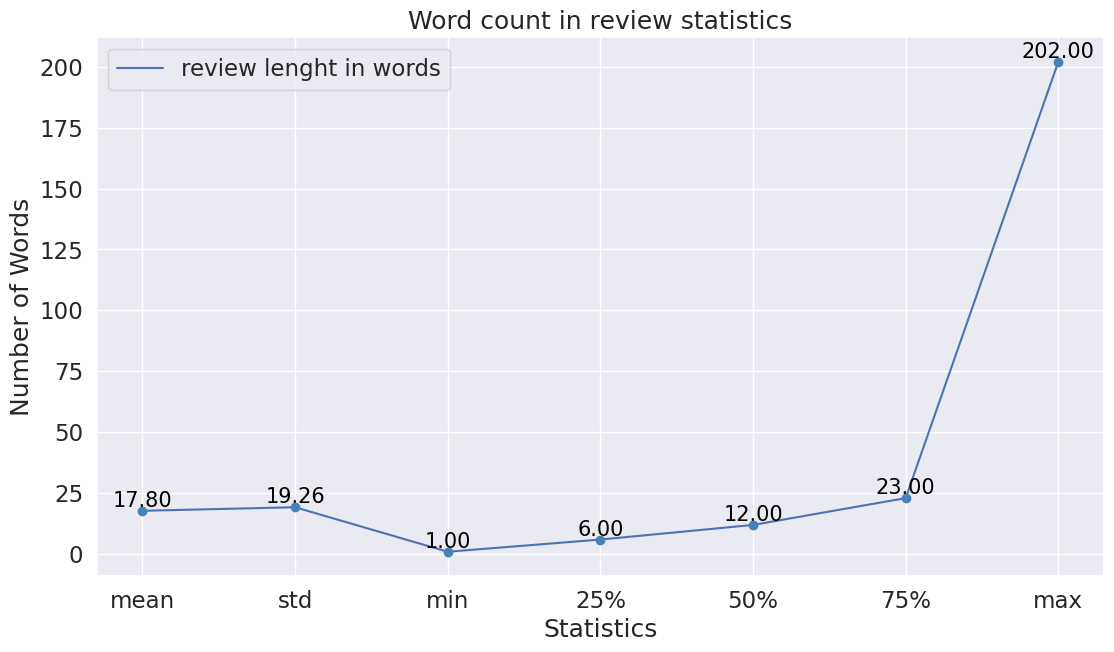

In [9]:
sns.set(font_scale=1.5)
# Assume 'df' is a pre-existing DataFrame

# Extracts the Series of descriptive statistics and drops 'count' and 'max'
descr_stats = df['descr_len'].describe().drop(['count'])

# Create a line plot
fig, ax = plt.subplots(figsize=(13, 7))

# Plot the line
descr_stats.plot(kind='line', ax=ax , label = 'review lenght in words')

# Add scatter dots for each statistic point and annotate them with their respective values
for idx, value in descr_stats.items():
    # Adding the scatter dot
    ax.scatter(idx, value, color='steelblue', zorder=5)
    # Annotating the point with its value
    ax.text(idx, value, '{:.2f}'.format(value), color='black', ha='center', fontsize=15, va='bottom')

# Show the plot
plt.title("Word count in review statistics")
plt.ylabel("Number of Words")
plt.xlabel('Statistics')
plt.legend()
plt.xticks(range(len(descr_stats)), descr_stats.index)  # Set x-ticks to the statistics' names
plt.show()

In [10]:
df.groupby('Predicted Team')['descr_len'].describe()

,count,mean,std,min,25%,50%,75%,max
Predicted Team,,,,,,,,
Ads,94.0,23.936170,25.942786,2.0,8.25,15.0,32.00,195.0
Content Architecture,82.0,22.341463,20.440954,3.0,10.00,15.5,26.00,103.0
Design System,109.0,14.935780,14.759978,2.0,6.00,10.0,19.00,86.0
General,684.0,9.242690,10.115418,1.0,3.00,6.0,12.00,110.0
Insights,93.0,17.344086,21.302936,1.0,6.00,11.0,21.00,156.0
Jobs,100.0,30.710000,29.038218,2.0,12.00,22.0,43.25,202.0
LinkedIn comparison,68.0,10.808824,6.793890,2.0,6.00,8.0,13.25,30.0
Messenger,64.0,27.906250,23.314086,3.0,13.00,18.0,37.25,106.0
Notification,58.0,28.413793,22.916350,2.0,11.25,21.0,37.50,108.0


In [11]:
df['categoryEncoded'].value_counts()

categoryEncoded
3     684
9     177
2     109
5     100
0      94
4      93
10     92
1      82
11     78
12     71
6      68
7      64
13     59
8      58
Name: count, dtype: int64

In [12]:
def regular_encode(texts, tokenizer, maxlen=512):
    enc_di = tokenizer.batch_encode_plus(
        texts, 
        return_attention_masks=False, 
        return_token_type_ids=False,
        pad_to_max_length=True,
        max_length=maxlen
    )
    
    return np.array(enc_di['input_ids'])

In [13]:
X = df['Converted English']
y = df['categoryEncoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2023, test_size = 0.165, stratify = y)
X_train.shape , y_train.shape, X_test.shape, y_test.shape

((1527,), (1527,), (302,), (302,))

In [14]:
X_train_encoded = regular_encode(X_train.astype('str'), tokenizer, maxlen = 80)
y_train_encoded = tf.keras.utils.to_categorical(y_train, num_classes = 14,dtype = 'int32')
X_test_encoded = regular_encode(X_test.astype('str'), tokenizer, maxlen = 80)
y_test_encoded = tf.keras.utils.to_categorical(y_test, num_classes = 14,dtype = 'int32')

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:2606: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
Keyword arguments {'return_attention_masks': False} not recognized.
Keyw

In [15]:
# Assuming you have some validation split ratio
valid_ratio = 0.05
train_items = int(len(X_train_encoded)*(1-valid_ratio))

X_train_dataset = X_train_encoded[:train_items]
y_train_dataset = y_train_encoded[:train_items]

X_valid_dataset = X_train_encoded[train_items:]
y_valid_dataset = y_train_encoded[train_items:]
X_train_dataset.shape, X_valid_dataset.shape

((1450, 80), (77, 80))

In [16]:
#creating the training and testing dataset.
BATCH_SIZE =16*strategy.num_replicas_in_sync
AUTO = tf.data.experimental.AUTOTUNE 
train_dataset = (
    tf.data.Dataset
    .from_tensor_slices((X_train_encoded, y_train_encoded))
    .repeat()
    .shuffle(2048)
    .batch(BATCH_SIZE)
    .prefetch(AUTO)
)
test_dataset = (
    tf.data.Dataset
    .from_tensor_slices(X_test_encoded)
    .batch(BATCH_SIZE)
)
valid_dataset = (
    tf.data.Dataset
    .from_tensor_slices((X_valid_dataset, y_valid_dataset))
    .batch(BATCH_SIZE)
)

2024-03-26 15:36:44.916545: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


# Building BERT Model

In [17]:
class BERT_Classification(tf.keras.Model):
    def __init__(self, BERT_model, num_classes, dropout_rate = 0.2):
        super().__init__()
        self.BERT = BERT_model
        self.dropout = tf.keras.layers.Dropout(rate = dropout_rate)
        self.fc = tf.keras.layers.Dense(num_classes, activation='softmax')
        
    def call(self, inputs, training = False):
        x = self.BERT(inputs, training = training)[1]
        x = self.dropout(x, training = training)
        return self.fc(x)

with strategy.scope():
    model = TFAutoModel.from_pretrained("bert-base-uncased") # base version of BERT
    classifier = BERT_Classification(model, num_classes=14)

    classifier.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='categorical_crossentropy', # for multiclass, single label classification
    metrics=[F1Score(num_classes=14, average="macro")]
    )

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

# Training

In [20]:
class_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
class_weights = dict(enumerate(class_weights))

early_stopping = EarlyStopping(monitor = 'val_loss', min_delta = 0.005, patience = 3, verbose = 1)

n_steps = X_train_encoded.shape[0] // BATCH_SIZE

In [21]:
# I've set the epoch to a high number due to the fact that the dropout rate is 0.2(not high not low)
# The early stopping procedure stops whenever the val_loss does not increase by 0.005 for 3 epochs
history = classifier.fit(
    train_dataset,
    epochs = 100,
    validation_data = valid_dataset,
    steps_per_epoch = n_steps,
    callbacks=[early_stopping],
    class_weight = class_weights
)

Epoch 1/100
95/95 [==============================] - 132s 1s/step - loss: 2.3410 - f1_score: 0.0650 - val_loss: 2.0575 - val_f1_score: 0.0807
Epoch 2/100
95/95 [==============================] - 128s 1s/step - loss: 1.9302 - f1_score: 0.1573 - val_loss: 1.5801 - val_f1_score: 0.2415
Epoch 3/100
95/95 [==============================] - 129s 1s/step - loss: 1.3236 - f1_score: 0.3438 - val_loss: 1.1676 - val_f1_score: 0.4685
Epoch 4/100
95/95 [==============================] - 129s 1s/step - loss: 0.9072 - f1_score: 0.4923 - val_loss: 0.9160 - val_f1_score: 0.6301
Epoch 5/100
95/95 [==============================] - 128s 1s/step - loss: 0.5804 - f1_score: 0.6000 - val_loss: 0.7271 - val_f1_score: 0.6063
Epoch 6/100
95/95 [==============================] - 129s 1s/step - loss: 0.5042 - f1_score: 0.6351 - val_loss: 0.5802 - val_f1_score: 0.7136
Epoch 7/100
95/95 [==============================] - 129s 1s/step - loss: 0.3485 - f1_score: 0.7219 - val_loss: 0.4138 - val_f1_score: 0.7593
Epoch 

In [22]:
# preds = model.predict(test_dataset,verbose = 1) # making predictions
predictions = classifier.predict(test_dataset,verbose = 1)
pred_classes = np.argmax(predictions, axis = 1) # converting the one hot vector output to a linear numpy array.

encoded_classes = encoder.classes_ # extracting the classes from the label encoder
predicted_category = [encoded_classes[x] for x in pred_classes] # mapping the encoded output to actual categories
true_category = [encoded_classes[x] for x in y_test]  

19/19 [==============================] - 10s 371ms/step


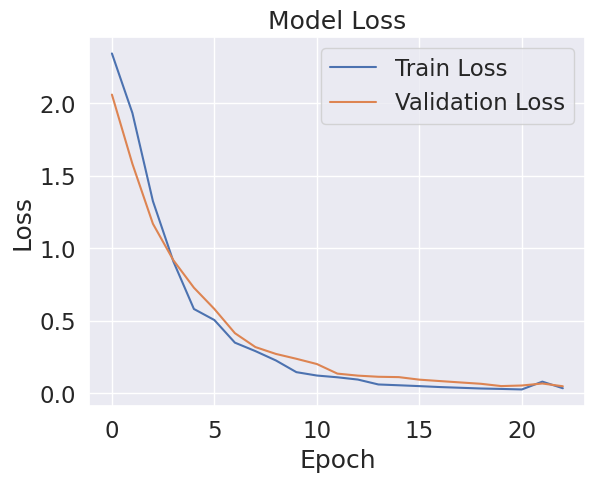

In [23]:
# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

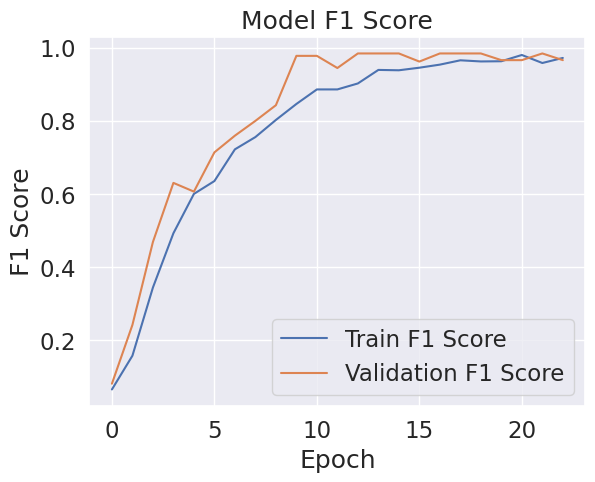

In [24]:
# Plot training & validation F1 score values
plt.plot(history.history['f1_score'], label='Train F1 Score')
if 'val_f1_score' in history.history:
    plt.plot(history.history['val_f1_score'], label='Validation F1 Score')
plt.title('Model F1 Score')
plt.ylabel('F1 Score')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

# Results

In [25]:
result_df = pd.DataFrame({'description':X_test,'true_category':true_category, 'predicted_category':predicted_category})
result_df

,description,true_category,predicted_category
1612,"too much advertising. as a premium customer, o...",Messenger,Ads
1225,home page not appealing. always the same job o...,Insights,Jobs
996,the app is partly confusing and not intuitive ...,Design System,Design System
339,"dear xing development team,it is a pity that b...",Messenger,Messenger
1603,"illogically structured, job recommendations fi...",Jobs,People/Homepage
...,...,...,...
1201,no more groups,Reference to Groups,Reference to Groups
1694,there are no more groups,Reference to Groups,Reference to Groups
1609,i was increasingly contacted by fake accounts ...,People/Homepage,People/Homepage
1518,"goes, nothing special",General,General


In [26]:
result_df[(result_df['true_category']!=result_df['predicted_category'])].sort_index()[:50]

,description,true_category,predicted_category
88,i can't read news properly. only the first sen...,Messenger,General
117,advertising,General,Ads
200,"big disadvantage compared to linkedin, too muc...",Design System,Insights
206,"no possibility for hashtag search, no possibil...",Jobs,Content Architecture
263,"user-unfriendly changes, no more groups . unba...",Premium,Ads
283,"the increasing restrictions, e.g. elimination ...",Content Architecture,Jobs
291,no more nice presentation. i liked the previou...,General,Design System
332,"since i start my retirement in a few days, i w...",General,Profile
453,"the presentation, functionality and use is not...",General,Design System
474,xing has changed a lot for the worse in recent...,Upsell,General


In [27]:
result_df[result_df['true_category']!=result_df['predicted_category']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 55 entries, 1612 to 1028
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   description         55 non-null     object
 1   true_category       55 non-null     object
 2   predicted_category  55 non-null     object
dtypes: object(3)
memory usage: 1.7+ KB


In [28]:
print('========================== {} ==========================\n'.format(classifier))
print("\t \t \t\t \t------------------")
print("\t \t \t \t \tF1 Score: ", round(f1_score(true_category, predicted_category, average='macro')*100,2),"%")
print("\t \t \t\t \tAccuracy: ", round(metrics.accuracy_score(true_category, predicted_category)*100,2),"%")
print("    \t \t \t \t       Hamming Loss: ", round(hamming_loss(true_category, predicted_category), 2))
print("    \t \t \t \t   Weighted F1 Score: ",round(f1_score(true_category, predicted_category, average='weighted')*100,2),"%")
print("    \t \t \t \t   ---------------------------\n")
print('========================== {} =========================='.format(classifier))

========================== <__main__.BERT_Classification object at 0x7ffa23ca3430> ==========================

	 	 		 	------------------
	 	 	 	 	F1 Score:  76.02 %
	 	 		 	Accuracy:  81.79 %
    	 	 	 	       Hamming Loss:  0.18
    	 	 	 	   Weighted F1 Score:  81.15 %
    	 	 	 	   ---------------------------

========================== <__main__.BERT_Classification object at 0x7ffa23ca3430> ==========================


In [29]:
print(metrics.classification_report(true_category, predicted_category))

                      precision    recall  f1-score   support

                 Ads       0.59      0.67      0.62        15
Content Architecture       0.77      0.71      0.74        14
       Design System       0.62      0.83      0.71        18
             General       0.91      0.89      0.90       113
            Insights       0.80      0.80      0.80        15
                Jobs       0.73      0.69      0.71        16
 LinkedIn comparison       0.92      1.00      0.96        11
           Messenger       0.82      0.82      0.82        11
        Notification       1.00      0.90      0.95        10
     People/Homepage       0.84      0.90      0.87        29
             Premium       0.67      0.53      0.59        15
             Profile       0.75      0.92      0.83        13
 Reference to Groups       1.00      1.00      1.00        12
              Upsell       0.25      0.10      0.14        10

            accuracy                           0.82       302
      

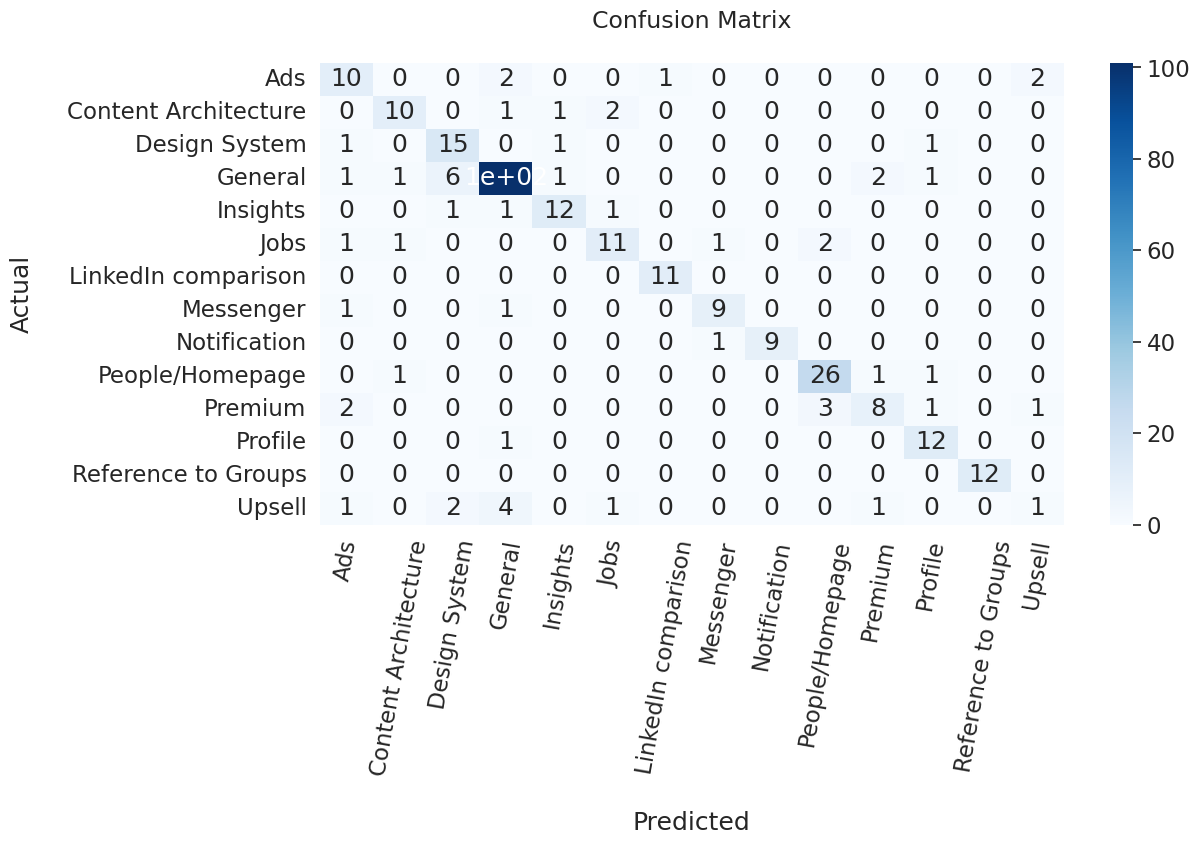

In [30]:
cm = confusion_matrix(y_true = true_category, y_pred = predicted_category)
fig, ax = plt.subplots(figsize=(12,6))

sns.heatmap(cm, 
            annot = True, 
            cmap = "Blues", 
            xticklabels = list(encoded_classes),
            yticklabels = list(encoded_classes),
            )

plt.ylabel('Actual\n')
plt.xlabel('\nPredicted')
plt.xticks(rotation = 80)
plt.title("Confusion Matrix\n", size = 17);